In [3]:
import pandas as pd

df = pd.read_csv("../data/raw/data.csv")
df.shape


(95662, 16)

In [26]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: S:\AI MAstery\week-5\credit-risk-model\notebooks


In [27]:
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
print("Calculated src path:", src_path)

Calculated src path: S:\AI MAstery\week-5\credit-risk-model\src


In [4]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])


In [6]:
# Numerical summary
df.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [7]:
# Categorical summary
df.describe(include='object')


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935


In [8]:
# Nulls
df.isnull().sum().sort_values(ascending=False).head(10)


TransactionId      0
BatchId            0
AccountId          0
SubscriptionId     0
CustomerId         0
CurrencyCode       0
CountryCode        0
ProviderId         0
ProductId          0
ProductCategory    0
dtype: int64

In [9]:
categorical = df.select_dtypes(include='object').columns.tolist()
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
datetime = df.select_dtypes(include='datetime64').columns.tolist()

print("Categorical:", categorical)
print("Numerical:", numerical)


Categorical: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']
Numerical: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


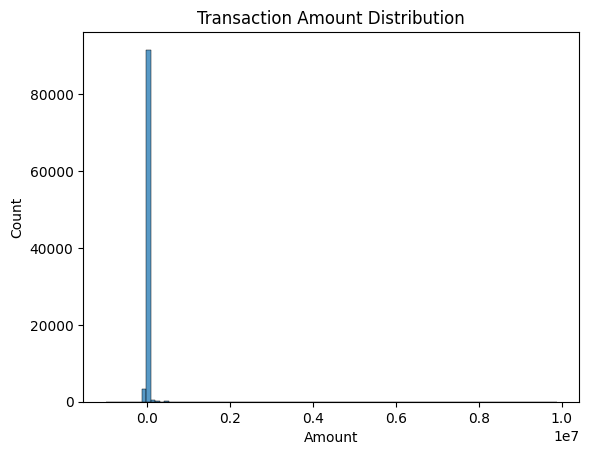

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Amount'], bins=100)
plt.title("Transaction Amount Distribution")
plt.show()


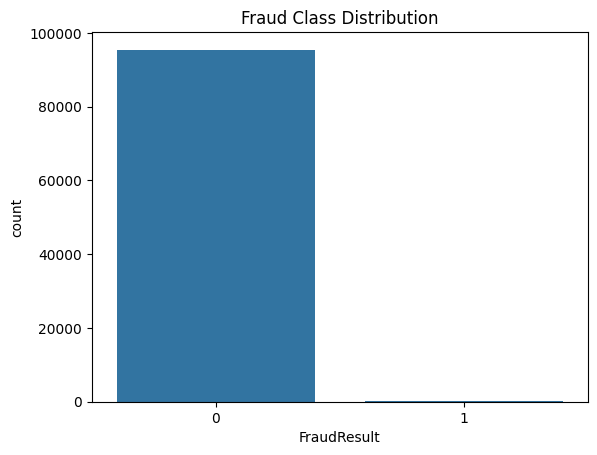

In [11]:
sns.countplot(x='FraudResult', data=df)
plt.title("Fraud Class Distribution")
plt.show()


In [ ]:
## 🔍 Top 5 Insights from Exploratory Data Analysis
'''
1. **Extreme Class Imbalance in Fraud Detection**  
   The target variable `FraudResult` is heavily imbalanced — only ~0.2% of transactions are marked as fraudulent. This will significantly impact model performance and requires mitigation via class weighting, resampling (e.g. SMOTE), or anomaly detection strategies.

2. **Heavy-Tailed Monetary Distribution**  
   `Amount` ranges from -1,000,000 to +9,880,000 with a median of 1,000, indicating the presence of extreme outliers. These may represent exceptional or risky transactions and need special handling (e.g., capping, binning, or log transformation) before modeling.

3. **CurrencyCode and CountryCode Are Constant**  
   The entire dataset operates in one country and currency (`UGX`, `256`), meaning these features have no predictive power and should likely be dropped during training.

4. **ChannelId and ProductCategory Are Key Segments**  
   The majority of transactions occur through `ChannelId_3` and within the `financial_services` product category. These categorical features may reveal behavioral patterns and should be encoded carefully (e.g., target encoding or one-hot).

5. **High Cardinality in User Identifiers**  
   Features like `AccountId`, `SubscriptionId`, `CustomerId`, and `BatchId` are high cardinality with no missing values. These should be excluded from modeling unless specifically aggregated or transformed (e.g., RFM grouping or behavior scoring).
'''

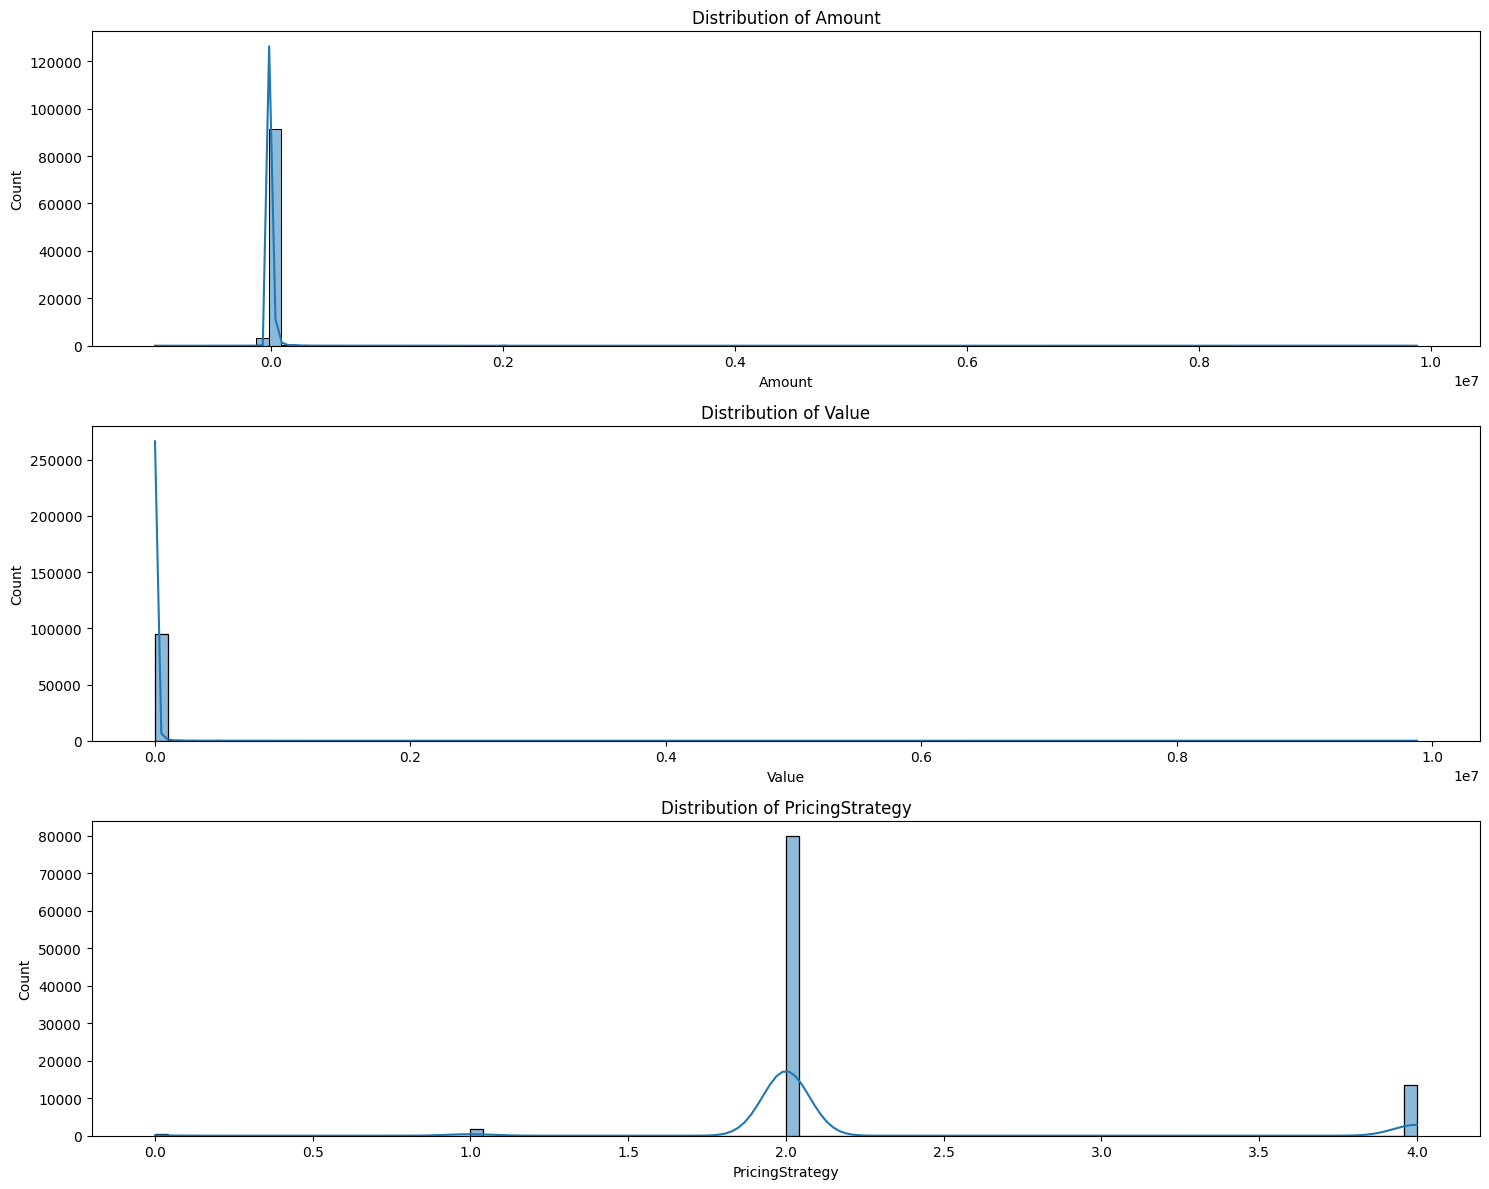

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution for each numerical feature
numerical = ['Amount', 'Value', 'PricingStrategy']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 1, i)
    sns.histplot(df[col], bins=100, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
plt.show()


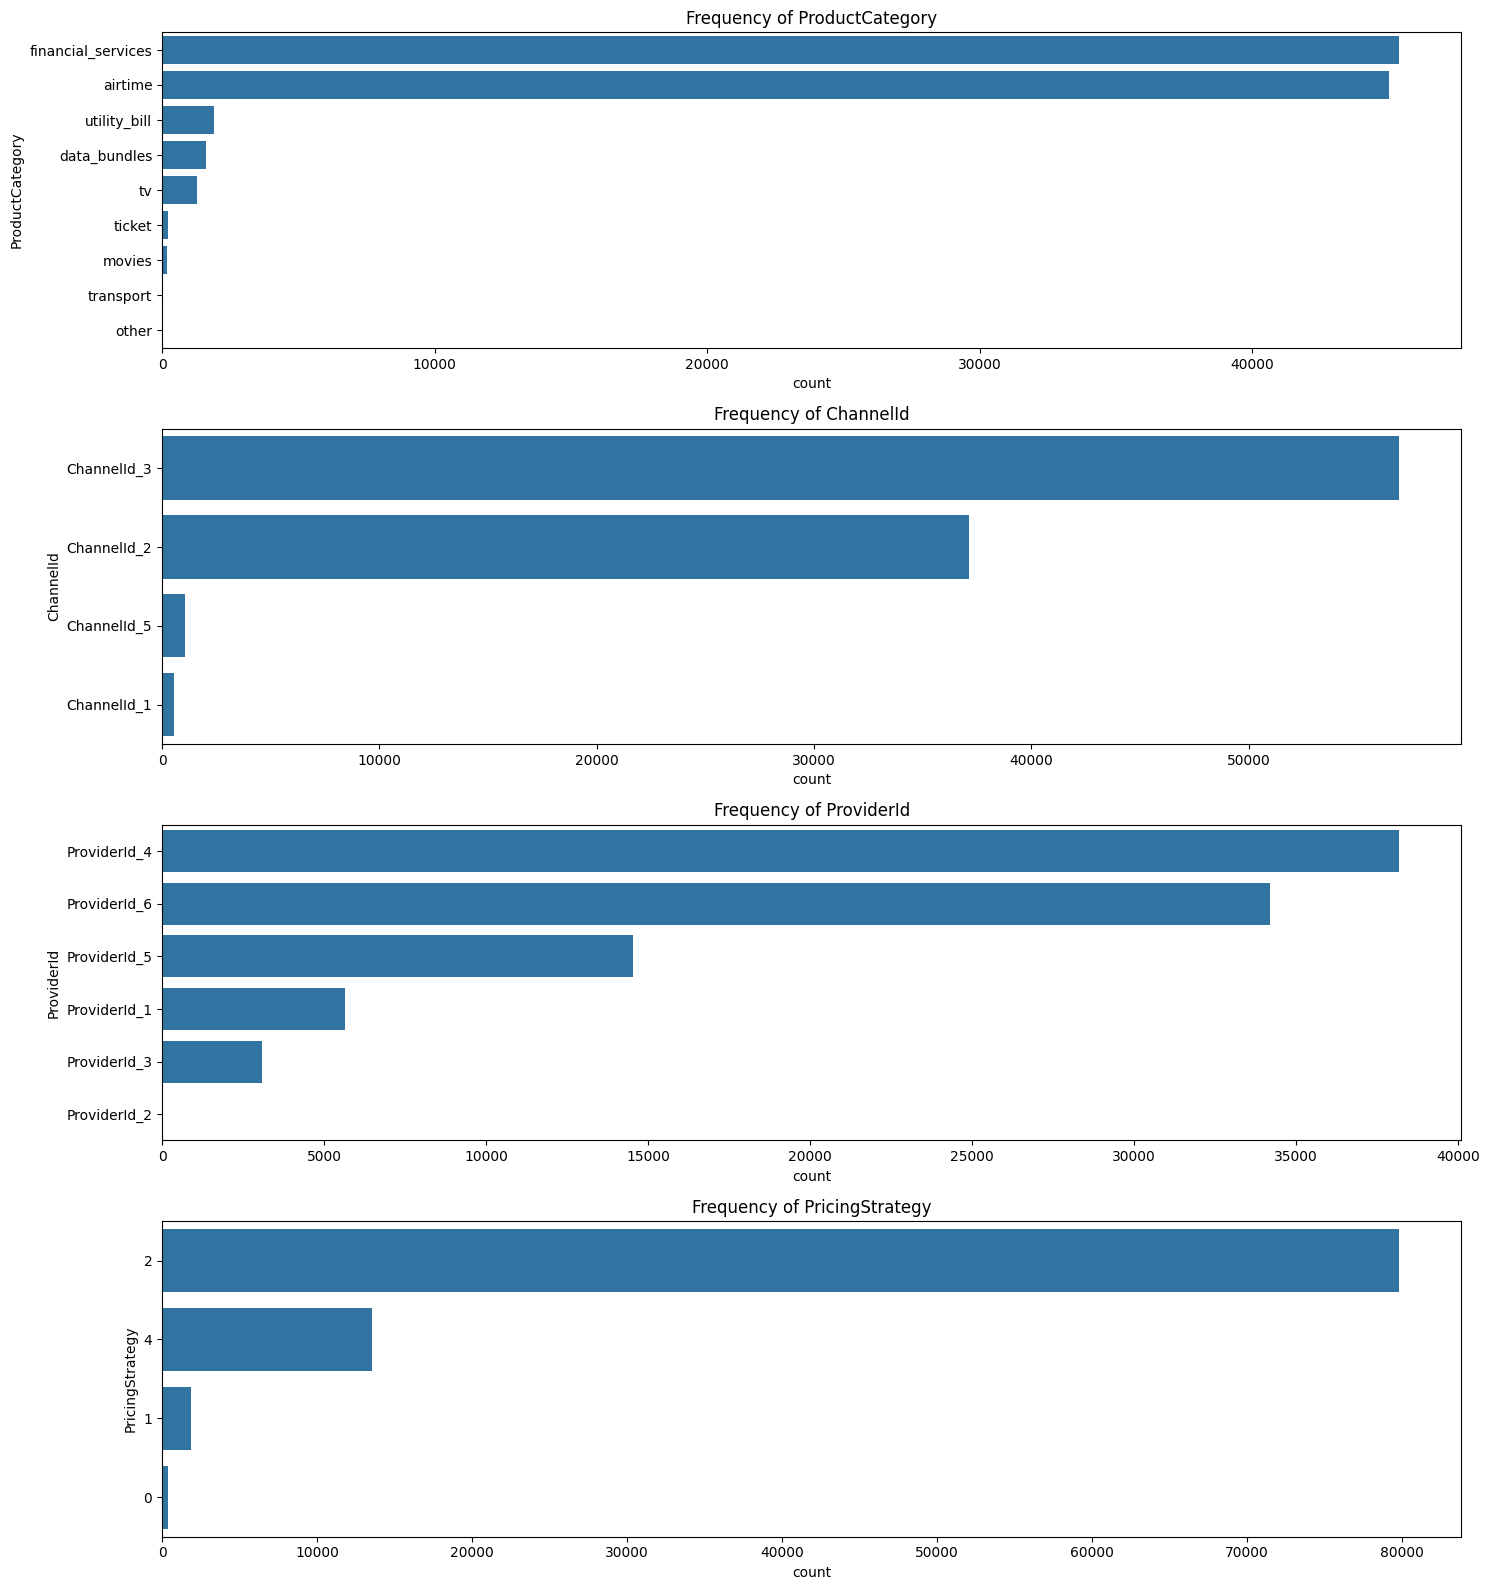

In [13]:
categorical = ['ProductCategory', 'ChannelId', 'ProviderId', 'PricingStrategy']

plt.figure(figsize=(15, 16))
for i, col in enumerate(categorical, 1):
    plt.subplot(4, 1, i)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.tight_layout()
plt.show()


In [14]:
df[numerical].skew()


Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
dtype: float64

In [15]:
import numpy as np

df['Amount_log'] = np.log1p(df['Amount'].clip(lower=1))  # Avoid log of negative or 0
df['Value_log'] = np.log1p(df['Value'])


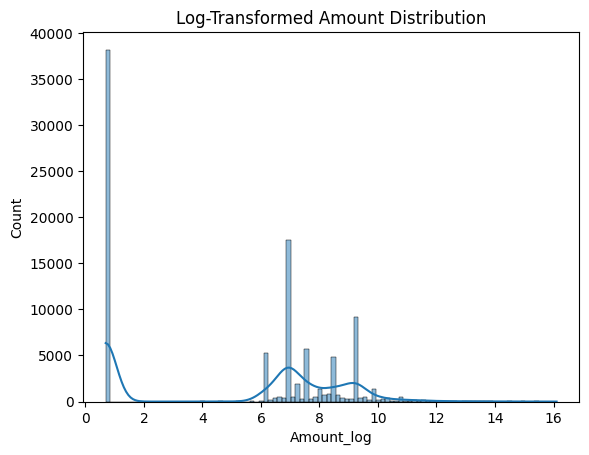

In [16]:
sns.histplot(df['Amount_log'], bins=100, kde=True)
plt.title("Log-Transformed Amount Distribution")
plt.show()


In [17]:
df[['Amount', 'Value']].corr()


,Amount,Value
Amount,1.000000,0.989692
Value,0.989692,1.000000


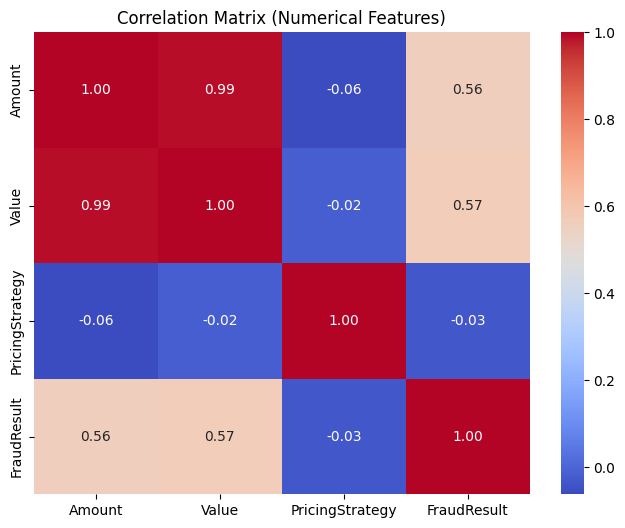

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Amount', 'Value', 'PricingStrategy', 'FraudResult']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


In [ ]:
'''- `Amount` and `Value` show near-perfect correlation (0.99), confirming redundancy.
- `FraudResult` has weak correlation with all numeric variables, suggesting that behavior-based or categorical patterns may hold more predictive power.
'''

In [19]:
df.isnull().sum().sort_values(ascending=False).head(10)


TransactionId           0
BatchId                 0
Amount_log              0
FraudResult             0
PricingStrategy         0
TransactionStartTime    0
Value                   0
Amount                  0
ChannelId               0
ProductCategory         0
dtype: int64

In [ ]:
'''### ✅ Missing Values Analysis

- All selected features have complete records — no missing values found.
- This allows us to proceed without imputation strategies for this version of the dataset.
'''

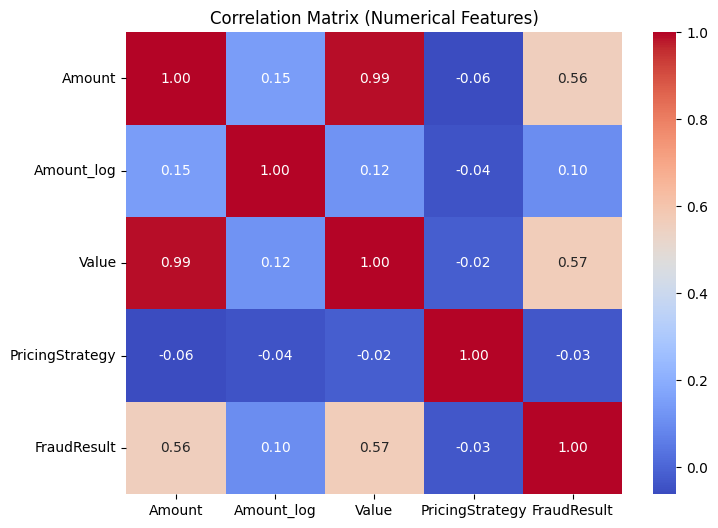

In [20]:
# Correlation heatmap
corr_features = ['Amount', 'Amount_log', 'Value', 'PricingStrategy', 'FraudResult']

plt.figure(figsize=(8, 6))
sns.heatmap(df[corr_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


In [ ]:
'''### 🔗 Correlation Insights

- `Amount` and `Value`: Correlation = 0.99 → redundant.
- `Amount_log` helps reduce skew while preserving relationship.
- `FraudResult` shows weak direct correlation with numeric features, suggesting fraud (and future default proxy) is driven by more complex behavior or categorical factors.
'''

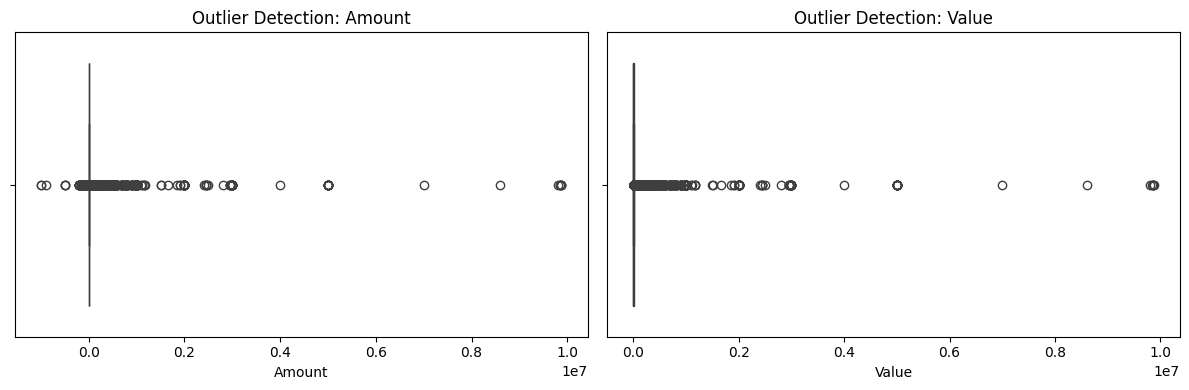

In [21]:
plt.figure(figsize=(12, 4))

# Amount
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Amount'])
plt.title("Outlier Detection: Amount")

# Value
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Value'])
plt.title("Outlier Detection: Value")

plt.tight_layout()
plt.show()
